In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('sd_upd1.csv')

In [17]:
data[['ballots_valid', 'ER', 'ER_share']]

,ballots_valid,ER,ER_share
0,161.0,108.0,0.650602
1,1008.0,785.0,0.778770
2,358.0,256.0,0.715084
3,336.0,241.0,0.717262
4,291.0,196.0,0.628205
...,...,...,...
118,332.0,159.0,0.462209
119,563.0,449.0,0.747088
120,341.0,171.0,0.501466
121,441.0,273.0,0.608018


In [24]:
((data.ER.values / (data.ballots_valid.values + data.not_valid.values) - data.ER_share.values)**2)

1.1786691259649883e-31

In [44]:
PARTIES = ['SpravRos', 'KPRF', 'Pens', 'LDPR', 'Yabloko', 'ER']
PARTIES_TITLES = {
    'SpravRos': 'Справедливая Россия',
    'ER': 'Единая Россия',
    'KPRF': 'КПРФ',
    'Pens': 'Партия пенсионеров',
    'LDPR': 'ЛДПР',
    'Yabloko': 'Яблоко',
}

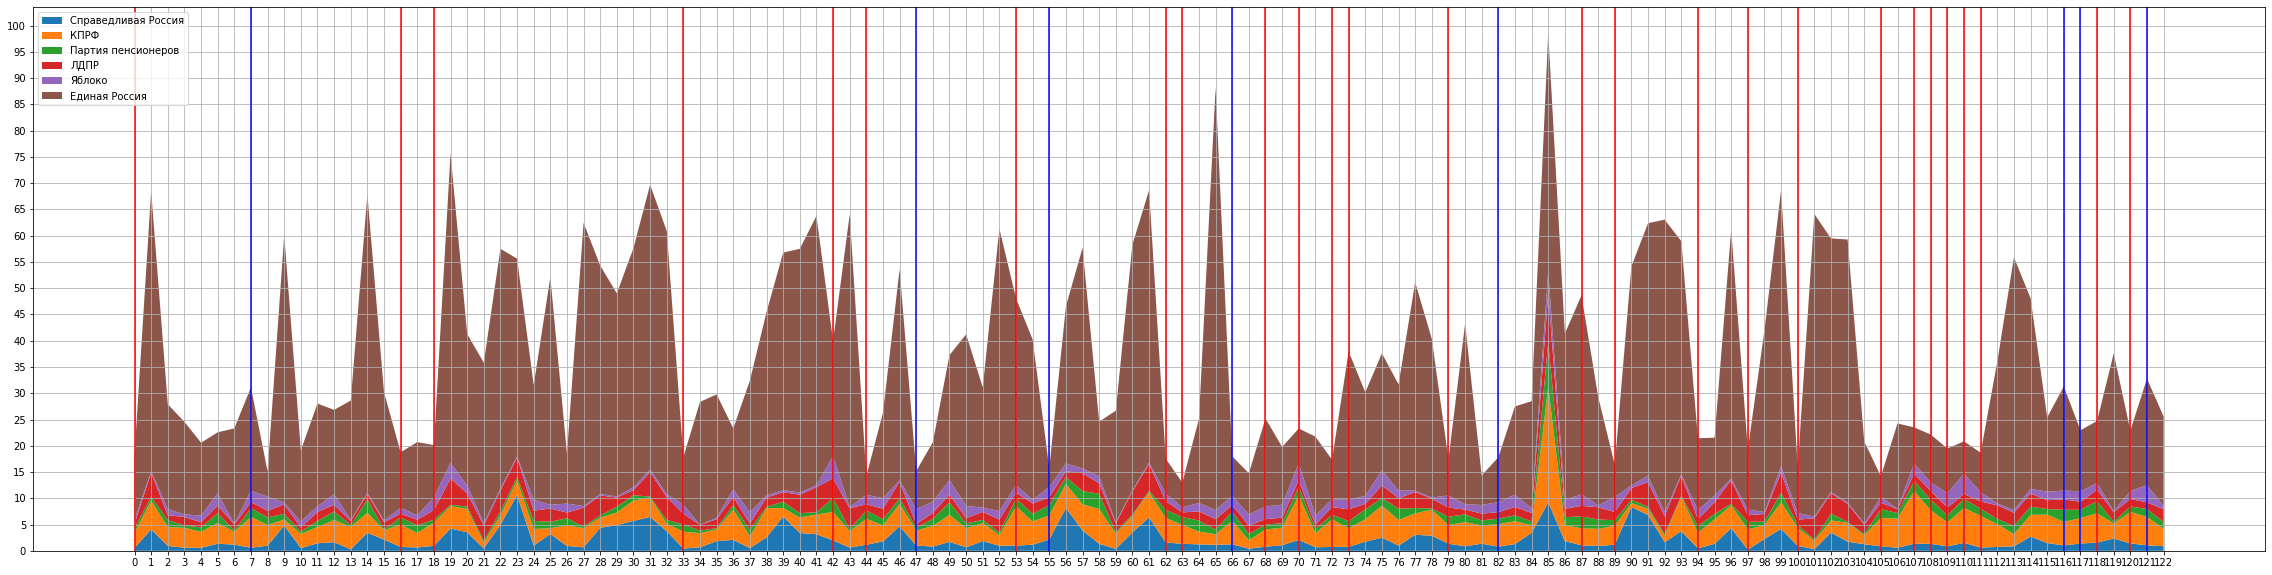

In [55]:
plt.figure(figsize=(40, 10))
plt.stackplot(range(len(data)), 100*(data[[party for party in PARTIES]].values / data[['total_izb']*len(PARTIES)]).transpose(), labels=[PARTIES_TITLES[party] for party in PARTIES])
for index, is_observed_fullday in enumerate(data[['is_observed', 'fullday']].values):
    is_observed, fullday = is_observed_fullday
    if not is_observed and not fullday:
        continue
    plt.axvline(index, 0, 100, color='r' if fullday else 'b')
plt.legend()
plt.grid(True)
plt.xticks(range(len(data)))
plt.yticks(range(0, 101, 5))
plt.show()

In [50]:
data.columns

Index(['total_izb', 'ballots_recieved', 'ballots_dosrok', 'ballots_indoor',
       'ballots_outdoor', 'ballots_unused', 'ballots_mobile',
       'ballots_stationar', 'not_valid', 'ballots_valid', 'SpravRos',
       'SpravRos_share', 'ER', 'ER_share', 'KPRF', 'KPRF_share', 'Pens',
       'Pens_share', 'LDPR', 'LDPR_share', 'Yabloko', 'Yabloko_share',
       'outdoor_share', 'turnover', 'is_observed', 'fullday'],
      dtype='object')